In [12]:
import h5py
import numpy 
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/gitlab/desc-python-prod/76008/py/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [13]:
# look at example file, this is what we need to get to
with h5py.File('/global/cscratch1/sd/chihway/TXPipe_old/data/example/inputs/star_catalog.hdf5') as f:

    # you can check what is in the file like this
    print(f.keys())
    print(f['stars'].keys())

<KeysViewHDF5 ['provenance', 'stars']>
<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'id', 'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_y', 'mag_z', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra', 'tract']>


Compare with the columns that exist in the original DES file: https://des.ncsa.illinois.edu/releases/y1a1/key-catalogs/key-psf

In [14]:
!cp ../inputs/DES_psf_catalog_original.hdf5 ../inputs/DES_psf_catalog.hdf5

In [15]:
# this is how we open an h5 file
with h5py.File('../inputs/DES_psf_catalog.hdf5','a') as f:

    # you can check what is in the file like this
    print(f.keys())
    print(f['stars'].keys())
    print(np.array(f['stars/id']))

    # now let's try to rename the columns
    for band in ['g','r','i','z','y']:
        f['stars/'+band+'_mag'][:]+=17
        f['stars/'+band+'_mag'][-10:]+=2
        f['stars/mag_'+band] = f['stars/'+band+'_mag']
        del f['stars/'+band+'_mag']
        print(np.array(f['stars/mag_'+band]))
    
    
    f['stars/calib_psf_reserved'] = np.ones(len(f['stars/mag_g'])).astype('int')
    f['stars/calib_psf_used'] = np.zeros(len(f['stars/mag_g'])).astype('int')
    f['stars/extendedness'] = np.zeros(len(f['stars/mag_g']))
    
#     f['stars/calib_psf_reserved'][:10] = 0
#     f['stars/calib_psf_used'][:10] = 1
    
#     f['stars/calib_psf_reserved'] = f['stars/calib_psf_reserved'].astype('int')
#     f['stars/calib_psf_used'] = f['stars/calib_psf_used'].astype('int')
    
    # print again to see if the names are changed
    print(f['stars'].keys())


<KeysViewHDF5 ['stars']>
<KeysViewHDF5 ['dec', 'g_mag', 'i_mag', 'id', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'r_mag', 'ra', 'u_mag', 'y_mag', 'z_mag']>
[1 1 1 ... 1 1 1]
[18 18 18 ... 20 20 20]
[18 18 18 ... 20 20 20]
[18 18 18 ... 20 20 20]
[18 18 18 ... 20 20 20]
[18 18 18 ... 20 20 20]
<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'id', 'mag_g', 'mag_i', 'mag_r', 'mag_y', 'mag_z', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra', 'u_mag']>


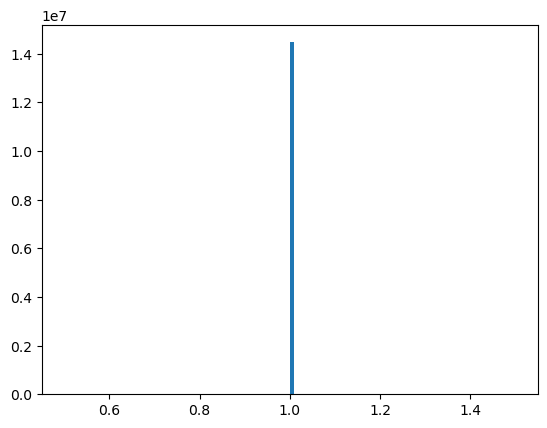

In [16]:
with h5py.File('../inputs/DES_psf_catalog_original.hdf5','a') as f:
    mplot.hist(np.array(f['stars/y_mag']), bins=100)

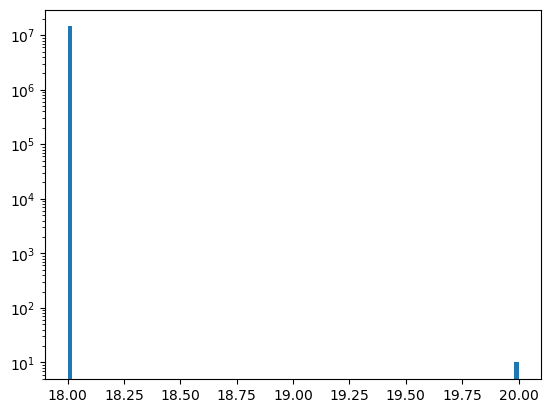

In [18]:
with h5py.File('../inputs/DES_psf_catalog.hdf5','a') as f:
    mplot.hist(np.array(f['stars/mag_y']), bins=100)
    mplot.yscale('log')

In [19]:
# check binned star catalog

In [21]:
with h5py.File('../outputs/binned_star_catalog.hdf5','a') as f:
    print(f['stars/bin_bright/ra'][:])

[]
